In [1]:
import sys
sys.path.append('../')
# from utils import *
# from processing import *
# from analysis import *
import model
import matplotlib.pyplot as plt
from umap.parametric_umap import ParametricUMAP
from sklearn.cluster import KMeans, SpectralClustering
import seaborn as sns
import pandas as pd
import numpy as np

from scipy.stats import gaussian_kde
from processing import *

c:\users\richard\anaconda3\envs\squidpy\lib\site-packages\umap\parametric_umap.py:15: UserWarning: The umap.parametric_umap package requires Tensorflow > 2.0 to be installed.
    You can install Tensorflow at https://www.tensorflow.org/install
    
    or you can install the CPU version of Tensorflow using 

    pip install umap-learn[parametric_umap]

    
  warn(


ImportError: umap.parametric_umap requires Tensorflow >= 2.0

In [2]:
vae_subspace = model.VAE_model('../processed_data/sagittal3D_propagated_decoded.h5')

In [3]:
train_data = vae_subspace.get_training_data(ratio = 0.1, group_to_select=vae_subspace.group_names)

sample 790 of pixels for training data from slide1_2_R00
sample 1174 of pixels for training data from slide1_2_R01
sample 1549 of pixels for training data from slide1_2_R02
sample 1943 of pixels for training data from slide1_2_R03
sample 2151 of pixels for training data from slide1_2_R04
sample 2401 of pixels for training data from slide1_2_R05
sample 2045 of pixels for training data from slide1_2_R06
sample 2375 of pixels for training data from slide1_2_R07
sample 2529 of pixels for training data from slide1_2_R08
sample 3166 of pixels for training data from slide1_2_R09
sample 3081 of pixels for training data from slide1_2_R10
sample 3283 of pixels for training data from slide1_2_R11
sample 3408 of pixels for training data from slide1_2_R12
sample 3317 of pixels for training data from slide1_2_R13
sample 3501 of pixels for training data from slide3_4_R00
sample 3915 of pixels for training data from slide3_4_R01
sample 4038 of pixels for training data from slide3_4_R02
sample 4202 of 

In [4]:
vae_subspace.paraUMAP_train(train_data/train_data.mean(1).reshape(-1,1), 3, False)

ParametricUMAP(decoder=<tensorflow.python.keras.engine.functional.Functional object at 0x000001729FB19AF0>,
               encoder=<tensorflow.python.keras.engine.functional.Functional object at 0x000001729FB192E0>,
               n_training_epochs=2,
               optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x000001729FCCED00>)
Construct fuzzy simplicial set
Mon Jul 12 11:48:32 2021 Finding Nearest Neighbors
Mon Jul 12 11:48:32 2021 Building RP forest with 27 trees
Mon Jul 12 11:48:54 2021 NN descent for 18 iterations
	 1  /  18
	 2  /  18
	Stopping threshold met -- exiting after 2 iterations
Mon Jul 12 11:49:12 2021 Finished Nearest Neighbor Search
Mon Jul 12 11:49:15 2021 Construct embedding


c:\users\richard\appdata\local\programs\python\python38\lib\site-packages\umap\parametric_umap.py:269: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  warn(


Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/20
2064/2064 [==============================] - 33s 15ms/step - loss: 0.0804
Epoch 2/20
2064/2064 [==============================] - 32s 15ms/step - loss: 0.0788
Epoch 3/20
2064/2064 [==============================] - 32s 15ms/step - loss: 0.0785
Epoch 4/20
2064/2064 [==============================] - 34s 16ms/step - loss: 0.0782
Epoch 5/20
2064/2064 [==============================] - 33s 16ms/step - loss: 0.0779
Epoch 6/20
2064/2064 [==============================] - 34s 16ms/step - loss: 0.0778
Epoch 7/20
2064/2064 [==============================] - 33s 16ms/step - loss: 0.0777
Epoch 8/20
2064/2064 [==============================] - 34s 16ms/step - loss: 0.0777
Epoch 9/20
2064/2064 [==============================] - 34s 17ms/step - loss: 0.0775
Epoch 10/20
2064/2064 [==============================] - 34s 16ms/step - loss: 0.0776
Epoch 11/20

In [5]:
with open('../processed_data/sagittal3D_train_embedding_UMAP.pkl', 'wb') as f:
    pickle.dump(vae_subspace.train_embedding_UMAP, f, protocol=pickle.HIGHEST_PROTOCOL)

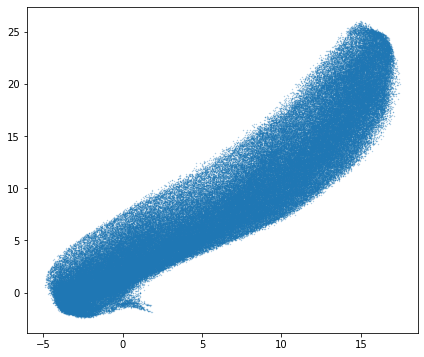

In [8]:
x = vae_subspace.train_embedding_UMAP[:,0]
y = vae_subspace.train_embedding_UMAP[:,1]
# from scipy.stats import gaussian_kde
# xy = np.vstack([x,y])
# z = gaussian_kde(xy)(xy)
# idx = z.argsort()
# x, y, z = x[idx], y[idx], z[idx]
fig, ax = plt.subplots( figsize=(7,6))
sc = ax.scatter(x,y,s=0.1,alpha=0.5,rasterized=True)

In [9]:
UMAP_datainfo = vae_subspace.data_info

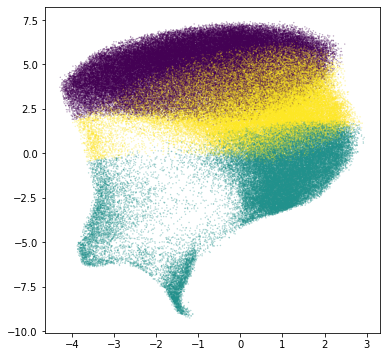

In [59]:
fig, ax = plt.subplots( figsize=(6,6))
sc = ax.scatter(x,y,c=kmeans.labels_,s=0.1,alpha=0.5,rasterized=True)

In [38]:
x.shape

(66434,)

Text(0.5, 0, 'Epoch')

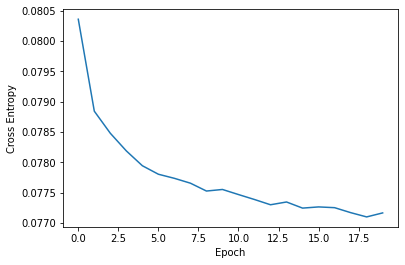

In [9]:
fig, ax = plt.subplots()
ax.plot(vae_subspace.embedder_UMAP._history['loss'])
ax.set_ylabel('Cross Entropy')
ax.set_xlabel('Epoch')

In [10]:
vae_subspace.paraUMAP_predict()

predicting slices...
embedding slide1_2_R00
9/9 [==============================] - 0s 3ms/step
embedding slide1_2_R01
12/12 [==============================] - 0s 4ms/step
embedding slide1_2_R02
16/16 [==============================] - 0s 3ms/step
embedding slide1_2_R03
20/20 [==============================] - 0s 3ms/step
embedding slide1_2_R04
22/22 [==============================] - 0s 4ms/step
embedding slide1_2_R05
25/25 [==============================] - 0s 4ms/step
embedding slide1_2_R06
22/22 [==============================] - 0s 3ms/step
embedding slide1_2_R07
24/24 [==============================] - 0s 3ms/step
embedding slide1_2_R08
26/26 [==============================] - 0s 4ms/step
embedding slide1_2_R09
31/31 [==============================] - 0s 4ms/step
embedding slide1_2_R10
31/31 [==============================] - 0s 4ms/step
embedding slide1_2_R11
34/34 [==============================] - 0s 4ms/step
embedding slide1_2_R12
34/34 [==============================] - 0s 4m

In [14]:
with open('../processed_data/Sagittal3D_UMAP_datainfo_decoded.pkl', 'wb') as f:
    pickle.dump(vae_subspace.data_info, f, protocol=3)

In [15]:
with open('../processed_data/Sagittal3D_UMAP_datainfo_decoded.pkl', 'rb') as fp:
    UMAP_datainfo = pickle.load(fp)

In [16]:
groups_show = ['slide3_4_R04','slide5_6_R04','slide7_8_R03']

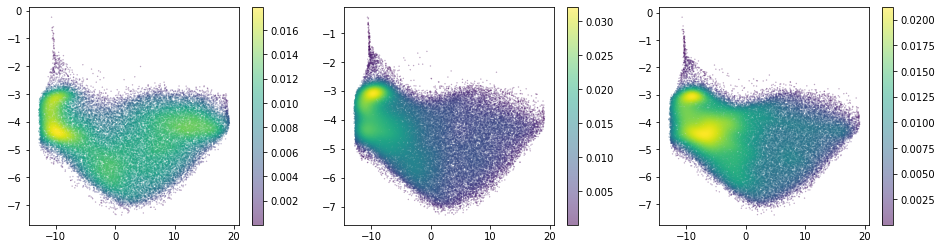

In [19]:
fig,axes = plt.subplots(1,3,figsize=(16,4))
index=1
for group in groups_show:
    x = UMAP_datainfo[group]['embeddings'][:,0]
    y = UMAP_datainfo[group]['embeddings'][:,1]
    #z = vae_subspace.data_info[group]['embeddings'][:,1]
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    plt.subplot(1,3,index)
    plt.scatter(x,y,c=z, s=0.1,alpha=0.5,rasterized=True)
    plt.colorbar()
    index+=1

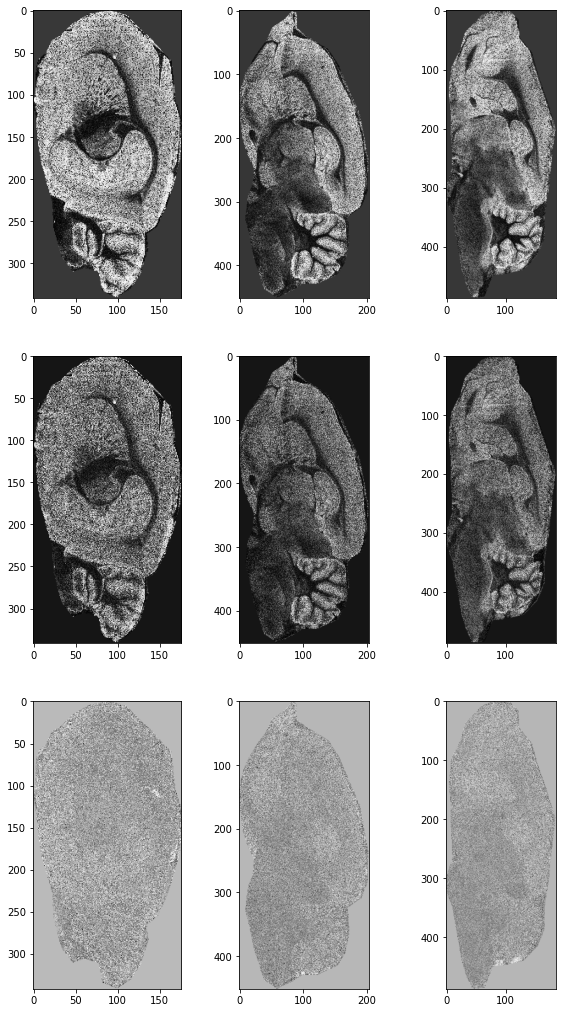

In [17]:
def hyperspectral_vis(results,coord):
    results[:,0] = (results[:,0]-min(results[:,0]))/(max(results[:,0])-min(results[:,0]))
    results[:,1] = (results[:,1]-min(results[:,1]))/(max(results[:,1])-min(results[:,1]))
    results[:,2] = (results[:,2]-min(results[:,2]))/(max(results[:,2])-min(results[:,2]))
    
    results[:,0] *= np.uint8(255/results[:,0].max())
    results[:,1] *= np.uint8(255/results[:,1].max())
    results[:,2] *= np.uint8(255/results[:,2].max())

    img = np.full((max(coord[:,1]),max(coord[:,0]),3),0,dtype='int')

    for i in range(len(coord)):
        img[coord[i,1]-1,coord[i,0]-1] = results[i]

    return img

idx=1
plt.figure(figsize=(10,18))
for group in groups_show:
    data = UMAP_datainfo[group]
    for i in range(3):
        umap_img = IonImg(data['embeddings'][:,i],data['coordinates'],True,False)
        plt.subplot(3,len(groups_show),idx+len(groups_show)*i)
        plt.imshow(umap_img,cmap='gray')
    idx+=1

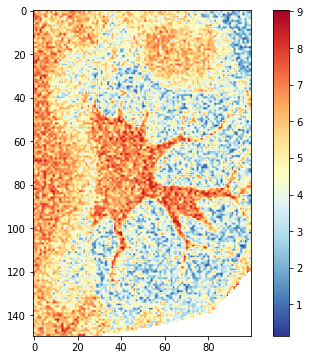

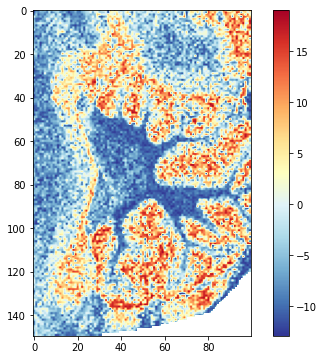

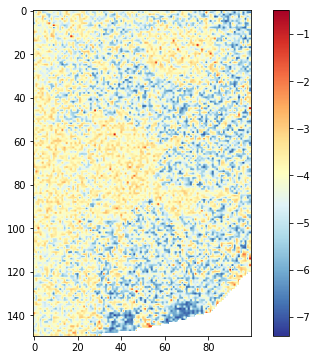

In [21]:
data=UMAP_datainfo[groups_show[2]]
for i in range(3):
    plt.figure(figsize=(8,6))
    plt.imshow(IonImg_show(data['embeddings'][:,i],data['coordinates'])[300:450,50:150],cmap='RdYlBu_r')
    plt.colorbar()

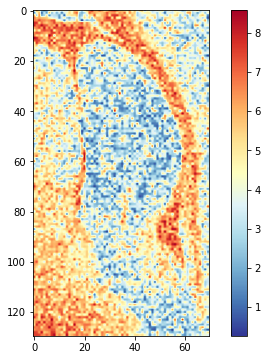

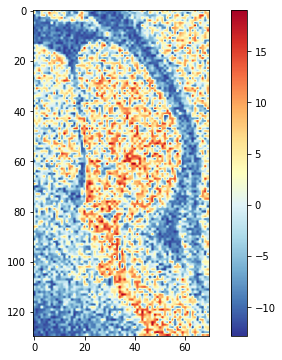

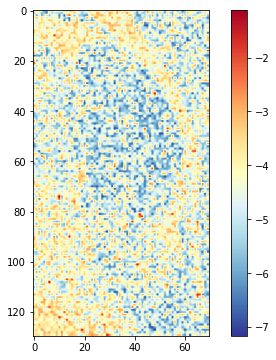

In [22]:
data=UMAP_datainfo[groups_show[1]]
for i in range(3):
    plt.figure(figsize=(8,6))
    plt.imshow(IonImg_show(data['embeddings'][:,i],data['coordinates'])[170:300,100:170],cmap='RdYlBu_r')
    plt.colorbar()

In [23]:
umap_embedding = []
slice_names = []
for key in UMAP_datainfo.keys():
    umap_embedding.append(UMAP_datainfo[key]['embeddings'])
    slice_names+=[key]*UMAP_datainfo[key]['coordinates'].shape[0]
umap_embedding = np.concatenate(umap_embedding)

In [82]:
import anndata
import scanpy as sc

def process(adata, min_dist, resolution):
    print('getting neighbors..')
    sc.pp.neighbors(adata, n_neighbors=30)
    print('leiden...')
    sc.tl.leiden(adata, resolution=resolution)
adata = anndata.AnnData(umap_embedding)
process(adata, min_dist=0.3, resolution = 0.5)

getting neighbors..


In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=19).fit(umap_embedding) 

In [46]:
kmeans_kwargs = { "init": "random", "n_init": 10, "max_iter": 1000, "random_state": 19}
from sklearn.metrics import silhouette_score

# A list holds the SSE values for each k
sse = []
scroes = []
for k in range(2, 8):
    print(k)
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(umap_embedding)
    #score = silhouette_score(umap_embedding, kmeans.labels_)
    sse.append(kmeans.inertia_)
    #scores.append(score)

2
3
4
5
6
7


In [35]:
umap_df = pd.DataFrame({'umap_1':umap_embedding[:,1],'umap_2':umap_embedding[:,2],'slice_name':slice_names,'cluster':kmeans.labels_})

In [159]:
# import pickle
# with open('../3DSagittal_umap_cluster.pkl', 'wb') as f:
#     pickle.dump(umap_df, f, protocol=pickle.HIGHEST_PROTOCOL)

In [31]:
import pickle
with open('../3DSagittal_umap_cluster.pkl', 'rb') as fp:
    umap_df = pickle.load(fp)

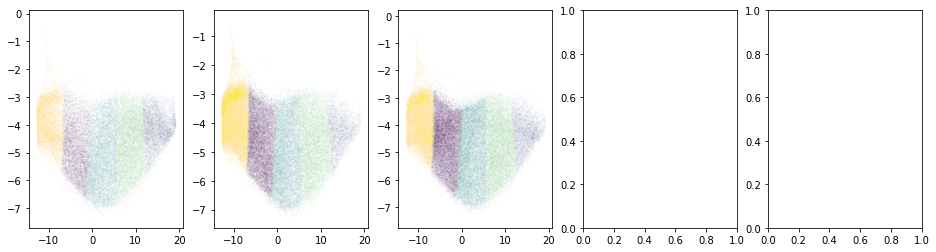

In [36]:
fig,axes = plt.subplots(1,5,figsize=(16,4))
ax = axes.ravel()
index = 0
for group in groups_show:
    data = umap_df[umap_df['slice_name']==group]
    ax[index].scatter(data['umap_1'],data['umap_2'],c=data['cluster'], s=0.02,alpha=0.1,rasterized=True)
    index+=1

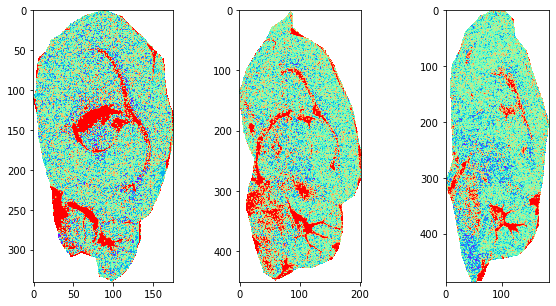

In [37]:
fig,axes = plt.subplots(1,len(groups_show),figsize=(10,5))
ax = axes.ravel()
index = 0
for group in groups_show:
    data = umap_df[umap_df['slice_name']==group]
    ax[index].imshow(IonImg_show(data['cluster'].values,UMAP_datainfo[group]['coordinates']),cmap='rainbow')
    index+=1

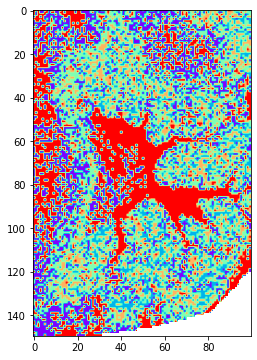

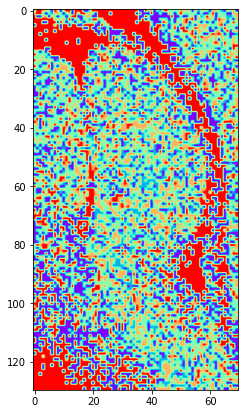

In [29]:
plt.figure(figsize=(8,6))
data = umap_df[umap_df['slice_name']==groups_show[2]]
plt.imshow(IonImg_show(data['cluster'].values,UMAP_datainfo[groups_show[2]]['coordinates'])[300:450,50:150],cmap='rainbow')
plt.figure(figsize=(5,7))
data = umap_df[umap_df['slice_name']==groups_show[1]]
plt.imshow(IonImg_show(data['cluster'].values,UMAP_datainfo[groups_show[1]]['coordinates'])[170:300,100:170],cmap='rainbow')

In [2]:
slice_order = ['slide1_2_R00', 'slide1_2_R01', 'slide1_2_R02', 'slide1_2_R03',
               'slide1_2_R04', 'slide1_2_R05', 'slide1_2_R06', 'slide1_2_R07',
               'slide1_2_R08', 'slide1_2_R09', 'slide1_2_R10', 'slide1_2_R11',
               'slide1_2_R12', 'slide1_2_R13', 'slide3_4_R00', 'slide3_4_R01',
               'slide3_4_R02', 'slide3_4_R03', 'slide3_4_R04', 'slide3_4_R05',
               'slide3_4_R06', 'slide3_4_R07', 'slide3_4_R08', 'slide3_4_R09',
               'slide5_6_R00', 'slide5_6_R01', 'slide5_6_R02', 'slide5_6_R03',
               'slide5_6_R04', 'slide5_6_R05', 'slide5_6_R06', 'slide5_6_R07',
               'slide5_6_R08', 'slide5_6_R09', 'slide7_8_R04', 'slide7_8_R03',
               'slide7_8_R02', 'slide7_8_R01', 'slide7_8_R00']

In [3]:
cluster_count = []
cluster_ratio = []
n_cluster = 5

for slice_ in slice_order:
    data = umap_df[umap_df['slice_name']==slice_]
    cluster_count.append(data['cluster'].value_counts())
    cluster_ratio.append(data['cluster'].value_counts()/data.shape[0])

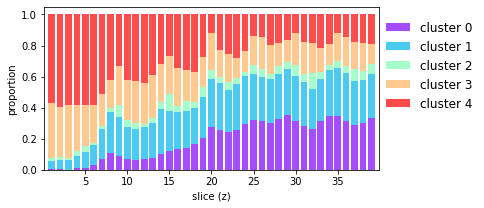

In [8]:
import matplotlib
fig,ax = plt.subplots(figsize=(6,3))
bottom = [0]*len(slice_order)
cmap = matplotlib.cm.get_cmap('rainbow')
norm = matplotlib.colors.Normalize(vmin=0.0, vmax=4.0)

for i in range(5):
    plt.bar(np.arange(1,40),[ratio[i] for ratio in cluster_ratio], bottom=bottom,label='cluster {}'.format(i),alpha=0.7,color=cmap(norm(i)))
    bottom = [x + y for x, y in zip(bottom,[ratio[i] for ratio in cluster_ratio])]
plt.legend()
plt.xlim([0.1,39.9])
plt.ylabel('proportion')
plt.xlabel('slice (z)')
plt.legend(frameon=False,fontsize=12,ncol=1,loc='lower center',bbox_to_anchor=(1.15, .3))